# How Length of Stay is Affected by Customer and Hotel Properties
https://www.kaggle.com/datasets/mojtaba142/hotel-booking
Problem Statement:  
We want to generate a model to estimate the possible length of stay for potential customers based on historical booking data we have. Having this information, we will be able to push ads to potential customers in a more accurate manner.

In [1]:
import pandas as pd
import numpy as np

## 1. Data Quick Look

In [2]:
hotel = pd.read_csv("../data/hotel_booking.csv")
pd.set_option('display.max_columns', None)
display(hotel)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3.0,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4.0,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0.0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0.0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0.0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0.0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0.0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


### 1.1. Narrow Down Investigation
1. Look at only City hotels
2. Look at non-canceled bookings that were eventually checked out
3. Remove columns with fake information and spoilers (adr)
4. Define target: 'stays_total' = 'stays_in_weekend_nights' + 'stays_in_week_nights'

In [3]:
df = hotel[hotel['hotel'] == 'City Hotel']
df = df[df['is_canceled'] == 0]
df = df[df['reservation_status'] == 'Check-Out']
df = df.drop(columns = 
             ['hotel', 'is_canceled', 'reservation_status', 'reservation_status_date', 
              'name', 'email', 'phone-number', 'credit_card', 'adr'])

df['stays_total'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df = df.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights'])
display(df)

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,stays_total
40060,6,2015,July,27,1,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0.0,No Deposit,6.0,NaN,0,Transient,0,0,2
40066,3,2015,July,27,2,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1.0,No Deposit,1.0,NaN,0,Transient-Party,0,0,3
40070,43,2015,July,27,3,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0.0,No Deposit,1.0,NaN,0,Transient-Party,0,0,2
40071,43,2015,July,27,3,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1.0,No Deposit,1.0,NaN,0,Transient-Party,0,0,2
40072,43,2015,July,27,3,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0.0,No Deposit,1.0,NaN,0,Transient-Party,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,August,35,30,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0.0,No Deposit,394.0,NaN,0,Transient,0,0,7
119386,102,2017,August,35,31,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0.0,No Deposit,9.0,NaN,0,Transient,0,2,7
119387,34,2017,August,35,31,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0.0,No Deposit,9.0,NaN,0,Transient,0,4,7
119388,109,2017,August,35,31,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,89.0,NaN,0,Transient,0,0,7


### 1.2. Data Type Check

In [4]:
df['agent'] = df['agent'].astype(str)
df['company'] = df['company'].astype(str)
df['arrival_date_month'] = df['arrival_date_month'].map(
    {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 
     'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46228 entries, 40060 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       46228 non-null  int64  
 1   arrival_date_year               46228 non-null  int64  
 2   arrival_date_month              46228 non-null  int64  
 3   arrival_date_week_number        46228 non-null  int64  
 4   arrival_date_day_of_month       46228 non-null  int64  
 5   adults                          46228 non-null  int64  
 6   children                        46228 non-null  float64
 7   babies                          46228 non-null  int64  
 8   meal                            46228 non-null  object 
 9   country                         46226 non-null  object 
 10  market_segment                  46228 non-null  object 
 11  distribution_channel            46228 non-null  object 
 12  is_repeated_guest          

In [6]:
df.describe()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,stays_total
count,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000
mean,80.702734,2016.176062,6.546054,27.159535,15.818616,1.828113,0.099896,0.007095,0.034416,0.021156,0.208510,0.264364,2.150082,0.041814,0.741088,2.923618
std,89.863028,0.690836,3.073564,13.562081,8.729889,0.536068,0.386141,0.103967,0.182298,0.336915,2.123928,0.709713,17.576460,0.201137,0.833852,1.762190
min,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,2016.000000,4.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,50.000000,2016.000000,7.000000,27.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,121.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,518.000000,2017.000000,12.000000,53.000000,31.000000,4.000000,3.000000,10.000000,1.000000,13.000000,72.000000,21.000000,379.000000,3.000000,5.000000,57.000000


array([[<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_month'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>],
       [<AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'required_car_parking_spaces'}>,
        <AxesSubplot:title={'center':'total_of_special_requests'}>,
        <AxesSubplot:title={'center':'stays_total'}>]], dtype=object)

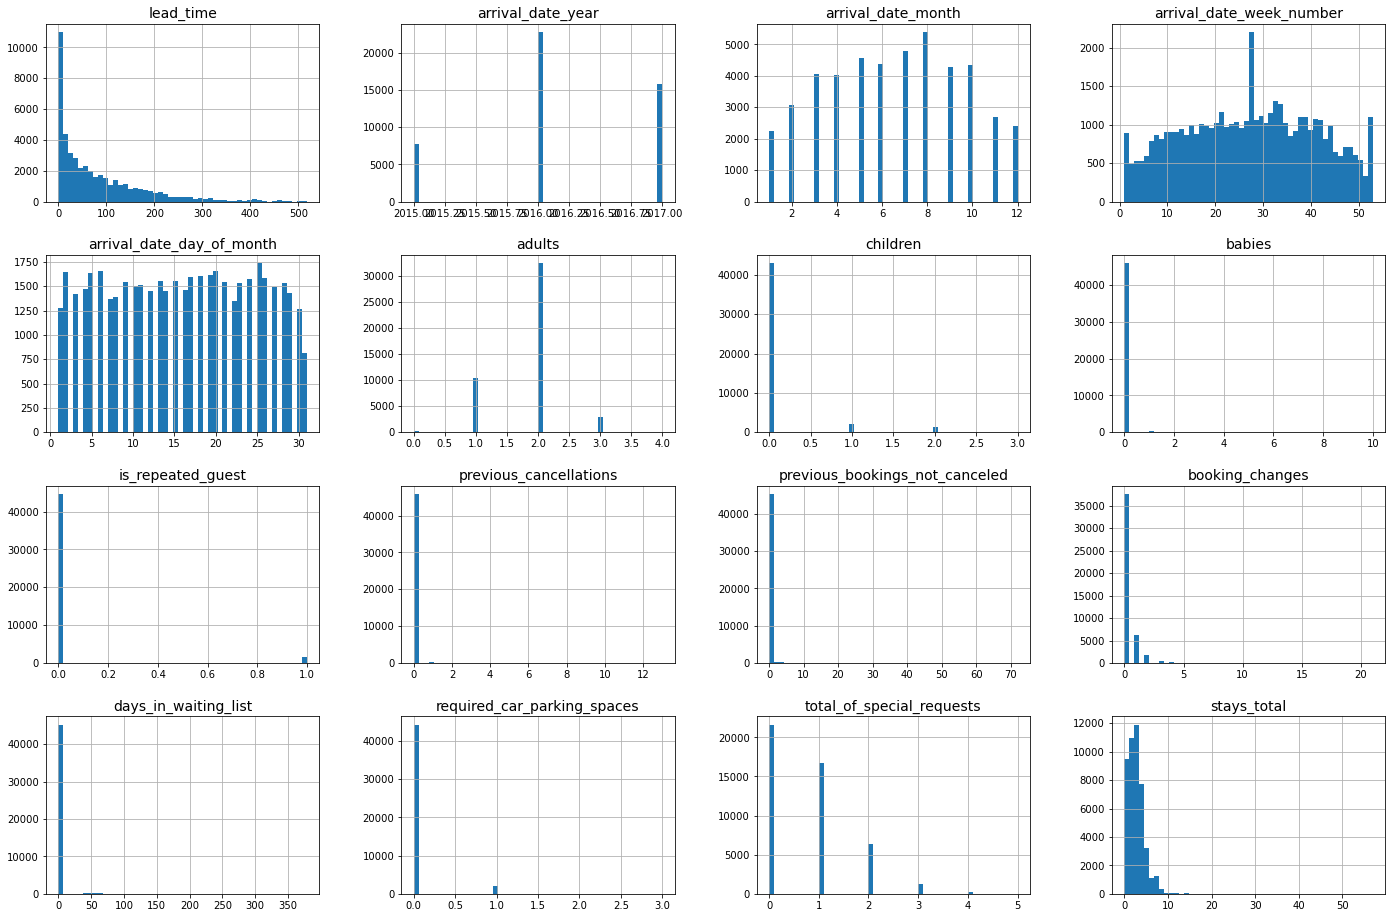

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(24, 16))
#save_fig("attribute_histogram_plots")  # extra code

### 1.3. Profiling and Correlation

In [8]:
import pandas_profiling

profile = df.profile_report(
    title="Report without correlations",
    correlations=None,
)
profile.to_file("../data/HotelProfile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#remove overly unified columns
df = df.drop(columns = ['is_repeated_guest', 'previous_cancellations', 'distribution_channel', 
                        'previous_bookings_not_canceled', 'deposit_type', 'days_in_waiting_list', 
                        'required_car_parking_spaces'])

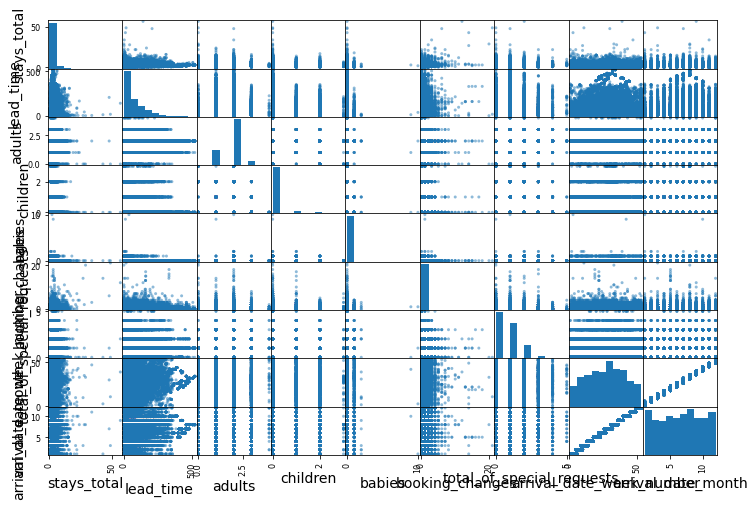

In [10]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
attributes = ["stays_total", "lead_time", "adults", 
              "children", "babies", "booking_changes", "total_of_special_requests", "arrival_date_week_number", "arrival_date_month"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

Reminding customers to book for hotel as early as possible might be helpful

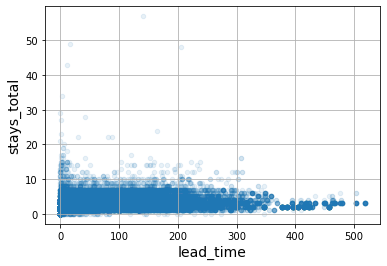

In [11]:
df.plot(kind="scatter", x="lead_time", y="stays_total",
             alpha=0.1, grid=True)
#save_fig("leadtime_vs_days_stayed_scatterplot")  # extra code
plt.show()

### 1.4. Experimenting with Attribute Combinations

In [12]:
df['total_ppl'] = df['adults'] + df['children'] + df['babies']

## 2. Prepare the Data for Machine Learning Algorithms

### 2.1. Data Cleaning - Handle NAs

In [13]:
#randomly remove some numbers for demostration purpose
import random

df_withnull = df.copy()
null_rows = random.sample(df_withnull.index.to_list(), 6)
df_withnull.loc[null_rows,'children'] = np.nan


In [14]:
null_rows_idx = df_withnull.isnull().any(axis=1)
df_withnull.loc[null_rows_idx].head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,reserved_room_type,assigned_room_type,booking_changes,agent,company,customer_type,total_of_special_requests,stays_total,total_ppl
77154,0,2016,1,4,20,2,NaN,0,BB,PRT,Complementary,G,G,1.0,nan,45.0,Transient,1,1,2.0
77907,17,2015,9,39,26,1,NaN,0,BB,ITA,Groups,A,A,1.0,1.0,nan,Transient-Party,0,4,1.0
80830,4,2015,11,48,23,1,0.0,0,BB,NaN,Groups,A,A,0.0,37.0,nan,Transient-Party,0,3,1.0
83435,0,2016,1,5,29,2,NaN,0,BB,PRT,Direct,A,A,1.0,nan,nan,Transient,0,3,2.0
88943,31,2016,5,20,13,2,NaN,0,BB,PRT,Offline TA/TO,D,D,0.0,16.0,nan,Transient,0,2,2.0


In [15]:
# Categorical: remove rows with NAs
df.dropna(subset=["country"], inplace=True)
df_withnull.dropna(subset=["country"], inplace=True)

df_withnull.loc[null_rows_idx].head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,reserved_room_type,assigned_room_type,booking_changes,agent,company,customer_type,total_of_special_requests,stays_total,total_ppl
77154,0,2016,1,4,20,2,NaN,0,BB,PRT,Complementary,G,G,1.0,nan,45.0,Transient,1,1,2.0
77907,17,2015,9,39,26,1,NaN,0,BB,ITA,Groups,A,A,1.0,1.0,nan,Transient-Party,0,4,1.0
83435,0,2016,1,5,29,2,NaN,0,BB,PRT,Direct,A,A,1.0,nan,nan,Transient,0,3,2.0
88943,31,2016,5,20,13,2,NaN,0,BB,PRT,Offline TA/TO,D,D,0.0,16.0,nan,Transient,0,2,2.0
99221,32,2016,10,41,4,3,NaN,0,BB,RUS,Online TA,D,D,0.0,9.0,nan,Transient,2,7,3.0


In [16]:
#Numerical: fill NAs by median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df_withnull_num = df_withnull.select_dtypes(include=[np.number])
imputer.fit(df_withnull_num)
#imputer.statistics_ should be the same as housing_num.median().values
#imputer.strategy is 'median'
X_withnull = imputer.transform(df_withnull_num)
df_imputed = pd.DataFrame(X_withnull, columns=df_withnull_num.columns,
                          index=df_withnull_num.index)

df_imputed.loc[null_rows_idx].head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,booking_changes,total_of_special_requests,stays_total,total_ppl
77154,0.0,2016.0,1.0,4.0,20.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0
77907,17.0,2015.0,9.0,39.0,26.0,1.0,0.0,0.0,1.0,0.0,4.0,1.0
83435,0.0,2016.0,1.0,5.0,29.0,2.0,0.0,0.0,1.0,0.0,3.0,2.0
88943,31.0,2016.0,5.0,20.0,13.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0
99221,32.0,2016.0,10.0,41.0,4.0,3.0,0.0,0.0,0.0,2.0,7.0,3.0


### 2.2. Drop Outliers

In [17]:
from sklearn.ensemble import IsolationForest

X = df.select_dtypes(include=[np.number])

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [18]:
df_no_outlier = df.iloc[outlier_pred == 1]

df_outlier = df.iloc[outlier_pred == -1]
print('dropped rows:', df_outlier.shape[0])
#housing_labels = housing_labels.iloc[outlier_pred == 1]

dropped rows: 8584


### 2.3. Handling Text and Categorical Attributes

In [19]:
df_cat = df[['meal', 'country', 'market_segment', 'reserved_room_type', 
             'assigned_room_type',  'agent', 'company', 'customer_type']] 
df_cat.head(10)

,meal,country,market_segment,reserved_room_type,assigned_room_type,agent,company,customer_type
40060,HB,PRT,Offline TA/TO,A,A,6.0,nan,Transient
40066,HB,PRT,Groups,A,A,1.0,nan,Transient-Party
40070,HB,PRT,Groups,A,A,1.0,nan,Transient-Party
40071,HB,PRT,Groups,A,A,1.0,nan,Transient-Party
40072,HB,PRT,Groups,A,A,1.0,nan,Transient-Party
40073,HB,PRT,Groups,A,A,1.0,nan,Transient-Party
40075,HB,PRT,Groups,A,A,1.0,nan,Transient-Party
40077,HB,PRT,Groups,A,A,1.0,nan,Transient-Party
40078,HB,PRT,Groups,A,A,1.0,nan,Transient-Party
40082,HB,PRT,Groups,A,A,1.0,nan,Transient-Party


#### 2.3.1. Ordinal Encoding

In [20]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
#ordinal_encoder.categories_ prints the unique values of the columns
df_cat_encoded[:10]

array([[  2., 113.,   5.,   0.,   0., 172., 192.,   2.],
       [  2., 113.,   4.,   0.,   0.,   0., 192.,   3.],
       [  2., 113.,   4.,   0.,   0.,   0., 192.,   3.],
       [  2., 113.,   4.,   0.,   0.,   0., 192.,   3.],
       [  2., 113.,   4.,   0.,   0.,   0., 192.,   3.],
       [  2., 113.,   4.,   0.,   0.,   0., 192.,   3.],
       [  2., 113.,   4.,   0.,   0.,   0., 192.,   3.],
       [  2., 113.,   4.,   0.,   0.,   0., 192.,   3.],
       [  2., 113.,   4.,   0.,   0.,   0., 192.,   3.],
       [  2., 113.,   4.,   0.,   0.,   0., 192.,   3.]])

#### 2.3.2. One-hot Encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder

#set sparse=False so that we don't need to convert df_cat_1hot.toarray()
cat_encoder = OneHotEncoder(sparse=False)
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot
#cat_encoder.categories_

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

### 2.4. Feature Scaling
1. MinMax
2. Standardize
3. Percentile
4. Gamma Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

df_num = df.select_dtypes(include=[np.number])
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
df_num_min_max_scaled = min_max_scaler.fit_transform(df_num)
df_num_min_max_scaled = pd.DataFrame(df_num_min_max_scaled, columns = df_num.columns)

In [23]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_num_std_scaled = std_scaler.fit_transform(df_num)
df_num_std_scaled = pd.DataFrame(df_num_std_scaled, columns = df_num.columns)

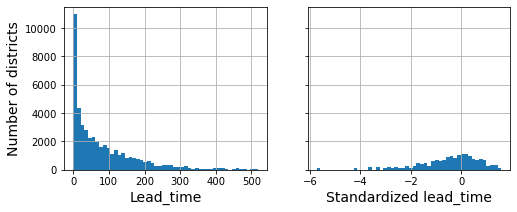

In [24]:
# sample visualization for standardization
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df["lead_time"].hist(ax=axs[0], bins=50)
df_num_std_scaled["lead_time"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Lead_time")
axs[1].set_xlabel("Standardized lead_time")
axs[0].set_ylabel("Number of districts")
#save_fig("long_tail_plot")
plt.show()

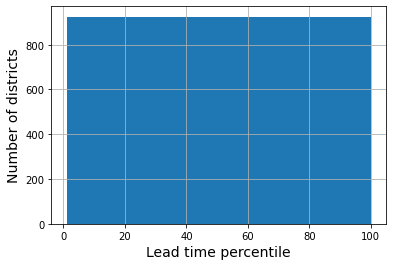

In [25]:
# sample visualization for percentile scaling
percentiles = [np.percentile(df["lead_time"].rank(method='first'), p)
               for p in range(1, 100)]
flattened_leadtime = pd.cut(df["lead_time"].rank(method='first'),bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_leadtime.hist(bins=50)
plt.xlabel("Lead time percentile")
plt.ylabel("Number of districts")
plt.show()

Gamma:   
1. compute the rbf (gaussian) kernel between $X$ and $Y$
2. Do gamma scaling

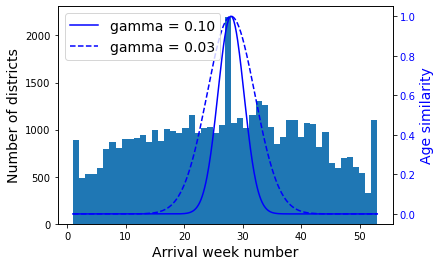

In [26]:
from sklearn.metrics.pairwise import rbf_kernel

arrive_simil_28 = rbf_kernel(df[["arrival_date_week_number"]], [[28]], gamma=0.1)

week = np.linspace(df["arrival_date_week_number"].min(),
                   df["arrival_date_week_number"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(week, [[28]], gamma=gamma1)
rbf2 = rbf_kernel(week, [[28]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Arrival week number")
ax1.set_ylabel("Number of districts")
ax1.hist(df["arrival_date_week_number"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(week, rbf1, color=color, label="gamma = 0.10")
ax2.plot(week, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
#save_fig("age_similarity_plot")
plt.show()

#### 2.4.1 Try standardized target and tranform back

In [27]:
from sklearn.linear_model import LinearRegression

df_booking = df.drop(columns = ['stays_total'])
df_labels = df[['stays_total']]

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(df_labels)

model = LinearRegression()
model.fit(df_booking[["total_ppl"]], scaled_labels)
some_new_data = df_booking[["total_ppl"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [28]:
predictions

array([[2.60120825],
       [2.60120825],
       [2.94595916],
       [2.94595916],
       [2.94595916]])

In [29]:
#another way to do it
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(df_booking[["total_ppl"]], df_labels)
predictions = model.predict(some_new_data)

predictions

array([[2.60120825],
       [2.60120825],
       [2.94595916],
       [2.94595916],
       [2.94595916]])

#### 2.4.2. Customize Transformer
1. Log Transformer
2. rbf  
  rbf for latitude and longitude: change kw_args=dict(Y=center coordinate, gamma=0.1) (not applicable)  
3. Ratio Transformer
4. Cluster labeling

In [30]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_leadtime = log_transformer.transform(df[["lead_time"]])

log_leadtime

,lead_time
40060,1.791759
40066,1.098612
40070,3.761200
40071,3.761200
40072,3.761200
...,...
119385,3.135494
119386,4.624973
119387,3.526361
119388,4.691348


In [31]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[28.]], gamma=0.1))
week_simil_28 = rbf_transformer.transform(df[["arrival_date_week_number"]])
week_simil_28

array([[0.90483742],
       [0.90483742],
       [0.90483742],
       ...,
       [0.00744658],
       [0.00744658],
       [0.00744658]])

In [32]:
# add one to remove inf cases generated by division
ratio_transformer = FunctionTransformer(lambda X: X.iloc[:, 0] / (X.iloc[:, 1]+1))
ratio_transformer.transform(df[['lead_time', 'booking_changes']])

40060       6.0
40066       1.5
40070      43.0
40071      21.5
40072      43.0
          ...  
119385     23.0
119386    102.0
119387     34.0
119388    109.0
119389    205.0
Length: 46226, dtype: float64

In [33]:
#Cluster labeling: location implementation
'''
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]
    
    
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)
'''

'\nfrom sklearn.cluster import KMeans\nfrom sklearn.base import BaseEstimator, TransformerMixin\nfrom sklearn.utils.validation import check_array, check_is_fitted\n\nclass StandardScalerClone(BaseEstimator, TransformerMixin):\n    def __init__(self, with_mean=True):  # no *args or **kwargs!\n        self.with_mean = with_mean\n\n    def fit(self, X, y=None):  # y is required even though we don\'t use it\n        X = check_array(X)  # checks that X is an array with finite float values\n        self.mean_ = X.mean(axis=0)\n        self.scale_ = X.std(axis=0)\n        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()\n        return self  # always return self!\n\n    def transform(self, X):\n        check_is_fitted(self)  # looks for learned attributes (with trailing _)\n        X = check_array(X)\n        assert self.n_features_in_ == X.shape[1]\n        if self.with_mean:\n            X = X - self.mean_\n        return X / self.scale_\n\n\nclass ClusterSimilarity(

### 2.5. Transformation Pipelines

### 2.5.1 Pipeline to preprocess hotel booking data 

In [34]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer


log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
#cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

#("cat", cat_pipeline, make_column_selector(dtype_include=object)),
preprocessing = ColumnTransformer([
    ("log", log_pipeline, ['arrival_date_week_number', 'arrival_date_day_of_month']),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [35]:
df.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent',
       'company', 'customer_type', 'total_of_special_requests', 'stays_total',
       'total_ppl'],
      dtype='object')

Aggregate categories

In [36]:
df.loc[:,'country'] = np.where((df['country']=='PRT')|(df['country']=='FRA')|(df['country']=='DEU'), df.loc[:,'country'], 'Other')
df.loc[:,'market_segment'] = np.where((df['market_segment']=='Online TA')|(df['market_segment']=='Offline TA/TO')|(df['market_segment']=='Direct'), df.loc[:,'market_segment'], 'Other')
df.loc[:,'agent'] = np.where((df['agent']=='9'), df.loc[:,'agent'], 'Other')
df.loc[:,'company'] = np.where((df['company']=='40'), df.loc[:,'company'], 'Other')

In [37]:
df_prepared = preprocessing.fit_transform(df)
df_prepared.shape

(46226, 45)

In [38]:
df_prepared

array([[ 0.25647671, -3.05988619,  0.        , ..., -0.88876314,
        -0.52411298, -1.38950649],
       [ 0.25647671, -2.21690057,  0.        , ..., -0.88876314,
         0.04335895, -1.38950649],
       [ 0.25647671, -1.72378559,  0.        , ..., -0.88876314,
        -0.52411298,  0.09640109],
       ...,
       [ 0.61012878,  1.11643007,  1.        , ...,  3.90824368,
         2.31324669,  0.09640109],
       [ 0.61012878,  1.11643007,  1.        , ..., -0.88876314,
         2.31324669,  0.09640109],
       [ 0.61012878,  1.03532194,  0.        , ...,  1.50974027,
         3.44819056,  0.09640109]])

In [39]:
df_prepared_fr = pd.DataFrame(df_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=df.index)
df_prepared_fr.head(2)

,log__arrival_date_week_number,log__arrival_date_day_of_month,cat__meal_BB,cat__meal_FB,cat__meal_HB,cat__meal_SC,cat__country_DEU,cat__country_FRA,cat__country_Other,cat__country_PRT,cat__market_segment_Direct,cat__market_segment_Offline TA/TO,cat__market_segment_Online TA,cat__market_segment_Other,cat__reserved_room_type_A,cat__reserved_room_type_B,cat__reserved_room_type_C,cat__reserved_room_type_D,cat__reserved_room_type_E,cat__reserved_room_type_F,cat__reserved_room_type_G,cat__assigned_room_type_A,cat__assigned_room_type_B,cat__assigned_room_type_C,cat__assigned_room_type_D,cat__assigned_room_type_E,cat__assigned_room_type_F,cat__assigned_room_type_G,cat__assigned_room_type_K,cat__agent_Other,cat__company_Other,cat__customer_type_Contract,cat__customer_type_Group,cat__customer_type_Transient,cat__customer_type_Transient-Party,remainder__lead_time,remainder__arrival_date_year,remainder__arrival_date_month,remainder__adults,remainder__children,remainder__babies,remainder__booking_changes,remainder__total_of_special_requests,remainder__stays_total,remainder__total_ppl
40060,0.256477,-3.059886,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.831338,-1.702454,0.147761,-1.544843,-0.258712,-0.068248,-0.372507,-0.888763,-0.524113,-1.389506
40066,0.256477,-2.216901,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.864722,-1.702454,0.147761,-1.544843,-0.258712,-0.068248,1.036502,-0.888763,0.043359,-1.389506


## 3. Select and Train a Model
Decision Tree performs better than linear regression;   
Random Forest performs better than Decision Tree

### 3.1. Split training and testing sets

In [40]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [41]:
train_set, test_set = shuffle_and_split_data(df, 0.2)
len(train_set)

36981

In [42]:
booking_train = train_set.drop(columns = ['stays_total'])
stay_train = train_set[['stays_total']]

booking_test = test_set.drop(columns = ['stays_total'])
stay_test = test_set[['stays_total']]

booking_train

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,reserved_room_type,assigned_room_type,booking_changes,agent,company,customer_type,total_of_special_requests,total_ppl
100504,26,2016,10,44,28,2,0.0,0,SC,Other,Online TA,A,A,1.0,Other,Other,Transient,2,2.0
40283,12,2015,7,29,18,2,0.0,0,BB,PRT,Other,A,A,0.0,Other,Other,Transient-Party,0,2.0
42444,22,2015,9,36,5,2,0.0,1,BB,PRT,Online TA,D,E,0.0,Other,Other,Transient,2,3.0
108137,1,2017,3,12,22,2,0.0,0,BB,PRT,Other,A,A,0.0,Other,Other,Transient,0,2.0
43079,135,2015,9,38,14,2,0.0,0,BB,PRT,Offline TA/TO,A,A,0.0,Other,Other,Transient-Party,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82335,44,2015,12,52,25,2,0.0,0,BB,FRA,Online TA,A,A,0.0,Other,Other,Transient,0,2.0
106908,23,2017,3,9,2,1,0.0,0,SC,PRT,Online TA,A,A,0.0,Other,Other,Transient,1,1.0
89049,7,2016,5,21,16,1,0.0,0,SC,DEU,Online TA,A,A,0.0,Other,Other,Transient,0,1.0
98405,107,2016,9,39,24,0,2.0,0,BB,DEU,Online TA,B,D,0.0,Other,Other,Transient,3,2.0


### 3.2. Transform the datasets

In [43]:
booking_train = preprocessing.fit_transform(booking_train)
booking_test = preprocessing.fit_transform(booking_test)

booking_train = pd.DataFrame(booking_train,
    columns=preprocessing.get_feature_names_out(),
    index=train_set.index)

booking_test = pd.DataFrame(booking_test,
    columns=preprocessing.get_feature_names_out(),
    index=test_set.index)

booking_train.head()

,log__arrival_date_week_number,log__arrival_date_day_of_month,cat__meal_BB,cat__meal_FB,cat__meal_HB,cat__meal_SC,cat__country_DEU,cat__country_FRA,cat__country_Other,cat__country_PRT,cat__market_segment_Direct,cat__market_segment_Offline TA/TO,cat__market_segment_Online TA,cat__market_segment_Other,cat__reserved_room_type_A,cat__reserved_room_type_B,cat__reserved_room_type_C,cat__reserved_room_type_D,cat__reserved_room_type_E,cat__reserved_room_type_F,cat__reserved_room_type_G,cat__assigned_room_type_A,cat__assigned_room_type_B,cat__assigned_room_type_C,cat__assigned_room_type_D,cat__assigned_room_type_E,cat__assigned_room_type_F,cat__assigned_room_type_G,cat__assigned_room_type_K,cat__agent_Other,cat__company_Other,cat__customer_type_Contract,cat__customer_type_Group,cat__customer_type_Transient,cat__customer_type_Transient-Party,remainder__lead_time,remainder__arrival_date_year,remainder__arrival_date_month,remainder__adults,remainder__children,remainder__babies,remainder__booking_changes,remainder__total_of_special_requests,remainder__total_ppl
100504,0.920019,0.992525,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.610831,-0.255602,1.117991,0.319117,-0.258298,-0.066759,1.043668,1.510580,0.094932
40283,0.352120,0.456576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.766314,-1.703140,0.144226,0.319117,-0.258298,-0.066759,-0.373891,-0.887529,0.094932
42444,0.646662,-1.097212,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.655255,-1.703140,0.793403,0.319117,-0.258298,9.110979,-0.373891,1.510580,1.576864
108137,-0.849883,0.699992,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.888479,1.191936,-1.154127,0.319117,-0.258298,-0.066759,-0.373891,-0.887529,0.094932
43079,0.720313,0.151729,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.599714,-1.703140,0.793403,0.319117,-0.258298,-0.066759,-0.373891,-0.887529,0.094932


In [44]:
booking_test

,log__arrival_date_week_number,log__arrival_date_day_of_month,cat__meal_BB,cat__meal_FB,cat__meal_HB,cat__meal_SC,cat__country_DEU,cat__country_FRA,cat__country_Other,cat__country_PRT,cat__market_segment_Direct,cat__market_segment_Offline TA/TO,cat__market_segment_Online TA,cat__market_segment_Other,cat__reserved_room_type_A,cat__reserved_room_type_B,cat__reserved_room_type_C,cat__reserved_room_type_D,cat__reserved_room_type_E,cat__reserved_room_type_F,cat__reserved_room_type_G,cat__assigned_room_type_A,cat__assigned_room_type_B,cat__assigned_room_type_C,cat__assigned_room_type_D,cat__assigned_room_type_E,cat__assigned_room_type_F,cat__assigned_room_type_G,cat__assigned_room_type_K,cat__agent_Other,cat__company_Other,cat__customer_type_Contract,cat__customer_type_Group,cat__customer_type_Transient,cat__customer_type_Transient-Party,remainder__lead_time,remainder__arrival_date_year,remainder__arrival_date_month,remainder__adults,remainder__children,remainder__babies,remainder__booking_changes,remainder__total_of_special_requests,remainder__total_ppl
94215,0.495205,-3.102473,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.847387,-0.252100,0.490670,0.326694,-0.260399,-0.078809,-0.367261,-0.893713,0.102365
110339,-0.368186,0.853966,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.542353,1.195519,-0.823611,0.326694,-0.260399,-0.078809,-0.367261,0.306342,0.102365
109866,-0.539034,0.141290,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.735193,1.195519,-0.823611,0.326694,-0.260399,-0.078809,-0.367261,-0.893713,0.102365
51934,-0.016250,0.902174,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.653077,-0.252100,-0.495041,0.326694,-0.260399,-0.078809,-0.367261,-0.893713,0.102365
88222,-0.216364,-2.250500,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.858607,-0.252100,-0.495041,-1.548097,-0.260399,-0.078809,-0.367261,0.306342,-1.399797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89227,-0.079750,0.305418,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.858607,-0.252100,-0.495041,0.326694,-0.260399,-0.078809,-0.367261,1.506396,0.102365
102612,1.076809,1.078064,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.757632,-0.252100,1.476380,0.326694,-0.260399,-0.078809,-0.367261,1.506396,0.102365
117168,0.407110,0.993262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.679096,1.195519,0.162099,-1.548097,-0.260399,-0.078809,-0.367261,0.306342,-1.399797
89915,-0.016250,0.853966,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.542353,-0.252100,-0.495041,0.326694,-0.260399,-0.078809,-0.367261,1.506396,0.102365


In [45]:
target_scaler = StandardScaler()
scaled_stay_train = target_scaler.fit_transform(stay_train)
scaled_stay_test = target_scaler.fit_transform(stay_test)

#scaled_predictions = model.predict(some_new_data)
#predictions = target_scaler.inverse_transform(scaled_predictions)

In [46]:
stay_test

,stays_total
94215,1
110339,1
109866,4
51934,3
88222,1
...,...
89227,3
102612,3
117168,3
89915,4


### 3.3. Run Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(booking_train, stay_train)
prediction = model.predict(booking_train)
#scaled_prediction = model.predict(booking_train)
#prediction = target_scaler.inverse_transform(scaled_prediction)
prediction

array([[2.9866333 ],
       [1.8772583 ],
       [2.0055542 ],
       ...,
       [2.40692139],
       [3.31512451],
       [4.05438232]])

In [48]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(stay_train, prediction,
                              squared=False)
lin_rmse

1.6273330586197645

#### 3.3.1 Regression Using pipeline

In [49]:
booking = train_set.drop(columns = ['stays_total'])
stay = train_set[['stays_total']]

In [50]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(booking, stay)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['arrival_date_week_number',
                                                   'arrival_date_day_of_month']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14dd9e730>)])),
                ('linearregression', LinearRegression())])

In [51]:
prediction = lin_reg.predict(booking)

lin_rmse = mean_squared_error(stay, prediction,
                              squared=False)
lin_rmse

1.6273330586197645

### 3.4. Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(booking, stay)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                   StandardScaler())]),
                                                  ['arrival_date_week_number',
                                                   'arrival_date_day_of_month']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14dd9e730>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [53]:
predictions = tree_reg.predict(booking)
tree_rmse = mean_squared_error(stay, predictions,
                              squared=False)
tree_rmse

0.12117223922364431

### 3.5. Cross validation

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
#for decision tree
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, booking, stay,
                              scoring="neg_root_mean_squared_error", cv=10)

In [56]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      1.936034
std       0.061790
min       1.850459
25%       1.897567
50%       1.917303
75%       1.985102
max       2.039833
dtype: float64

In [57]:
#for random forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, booking, stay,
                                scoring="neg_root_mean_squared_error", cv=10)

In [58]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      1.420181
std       0.078793
min       1.324418
25%       1.374541
50%       1.410498
75%       1.422366
max       1.600475
dtype: float64

## 4. Model Tuning

### 4.1 Grid Search

In [59]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'random_forest__max_features': [4, 6, 8]},
    {'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(booking, stay)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('log',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x14dd9e730>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6, 8]},
                         {'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [60]:
grid_search.best_params_

{'random_forest__max_features': 10}

In [61]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('...
                                                  ['arrival_date_week_number',
                                                   'arrival_date_day_of_month']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1371cff10>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=10, random_state=42))])

In [62]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
5,10,1,1,1,1
2,8,1,1,1,1
4,8,1,1,1,1
1,6,1,1,1,1
3,6,1,1,1,1


### 4.2. Randomized Search

In [63]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(booking, stay)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('log',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out='...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x14dd9e730>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14d3f9b80>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [64]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
1,16,1,1,1,1
2,12,1,1,1,1
5,12,1,1,1,1
6,12,1,1,1,1
3,9,1,1,1,1


## 5. Analyze best model

In [65]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.11, 0.14, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.01,
       0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.01, 0.24, 0.03, 0.06, 0.02, 0.01, 0.  , 0.08, 0.05, 0.03])

In [66]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.23659480162825822, 'remainder__lead_time'),
 (0.14150670491440642, 'log__arrival_date_day_of_month'),
 (0.11261586893884244, 'log__arrival_date_week_number'),
 (0.07690936646835599, 'remainder__booking_changes'),
 (0.05509363480045465, 'remainder__arrival_date_month'),
 (0.04718005530884598, 'remainder__total_of_special_requests'),
 (0.03071835703697195, 'remainder__arrival_date_year'),
 (0.030254854433118022, 'cat__country_PRT'),
 (0.029780834558131526, 'remainder__total_ppl'),
 (0.017742828718547526, 'remainder__adults'),
 (0.01435967488777417, 'cat__market_segment_Online TA'),
 (0.01296194896794089, 'cat__customer_type_Transient-Party'),
 (0.012674341783738465, 'cat__country_Other'),
 (0.011657828294273184, 'cat__assigned_room_type_A'),
 (0.011611439221652744, 'cat__market_segment_Other'),
 (0.011491943976914231, 'cat__market_segment_Direct'),
 (0.01109590078601041, 'cat__reserved_room_type_A'),
 (0.01092520747326761, 'cat__customer_type_Transient'),
 (0.010726687834416616, 'cat

## 6. Evaluate System on the Test Set

In [67]:
X_test = test_set.drop("stays_total", axis=1)
y_test = test_set["stays_total"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

1.505801232155109


In [68]:
#compute a 95% confidence interval for the test RMSE:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1.30546268, 1.68245116])

## 7. Model Persistence using joblib

### 7.1. Dump model

In [69]:
import joblib

joblib.dump(final_model, "my_hotel_stay_model.pkl")

['my_hotel_stay_model.pkl']

### 7.2. Load model

In [70]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel


final_model_reloaded = joblib.load("my_hotel_stay_model.pkl")

new_data = df.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(df)

In [71]:
predictions

array([2.015, 2.76 , 2.   , ..., 5.88 , 6.28 , 7.24 ])